In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [148]:
class discrete:
    # Elementary signal definition
    #########################################
    
    # Kronecker impulsion
    def kronecker_imp(n):
        assert np.all(np.array(n, dtype=int) == n), 'kronecker_imp: n sould be an integer or an array of integers.'
        return np.where(n == 0, 1, 0)
        
    # Unit jump
    def unit_jump(n):
        assert np.all(np.array(n, dtype=int) == n), 'unit_jump: n sould be an integer or an array of integers.'
        return np.where(n >= 0, 1, 0)
     
    # Causal polynomial of degree N>=1. N
    # is the degree and n is the value to evaluate the polynomial
    def causal_poly(n, N):
        # Check input parameters
        assert np.all(np.array(n, dtype=int) == n), 'causal_poly: n sould be an integer or an array of integers.'
        assert int(N) == N, 'causalpol: The provided polynomial degree is not an integer.'
        assert N >= 1, 'causalpol: The polynomial degree should be bigger than 0.'
        N = int(N)
        # Construct plynomial array where each row corresponds to an n value and each column corresponds to an N value
        A = np.zeros((len(n), N))
        A[:][n>=0] = np.linspace(1, N, N)
        A.T[:, n>=0] += n[n>=0]
        # Calculate product over rows and normalize
        return np.prod(A, axis=1) / np.math.factorial(N)
    
    # Rectangular signal
    def rect_signal(n, n1, n2):
        assert np.all(np.array(n, dtype=int) == n), 'rect_signal: n sould be an integer or an array of integers.'
        return np.where(np.logical_and(n>=n1, n<=n2), 1, 0)
        
    # Complex exponential
    def complex_exp(n, w0):
        assert np.all(np.array(n, dtype=int) == n), 'complex_exp: n sould be an integer or an array of integers.'
        assert type(w0) != complex, 'complex_exp: w0 should be a real number.'
        return np.exp(1j * w0 * n)
    
    # Cosine
    def cos(n, w0=1, degrees=False):
        assert np.all(np.array(n, dtype=int) == n), 'cos: n sould be an integer or an array of integers.'
        assert type(w0) != complex, 'cos: w0 should be a real number.'
        if degrees:
            n = n * np.pi / 180
        return np.cos(w0 * n)
    
    # Sine
    def sin(n, w0=1, degrees=False):
        assert np.all(np.array(n, dtype=int) == n), 'sin: n sould be an integer or an array of integers.'
        assert type(w0) != complex, 'sin: w0 should be a real number.'
        if degrees:
            n = n * np.pi / 180
        return np.sin(w0 * n)
    
    #Discrete signal transformations/operations
    ####################################################
    
    #Discrete convolution. First argument: array of length N. Second argument: array of lenght M
    #Third argument, mode:
        #1) "full", it returns the convolution at each point of overlap, with an output shape of N+M-1. 
        #At the end-points of the convolution, the signals do not overlap completely, and boundary effects may be seen
        #2) "same" returns output of length max(M, N). Boundary effects are still visible.
        #3) "valid" returns output of length max(M, N) - min(M, N) + 1. The convolution product is only given for points where the signals overlap completely. 
        #Values outside the signal boundary have no effect.
    def convolve(f, g, mode='full'):
        return np.convolve(f, g, mode=mode)
    
    #Circular convolution. Use of the convolution theorem to perform a circular convolution
    #The two arrays must have the same length N and be N-periodic
    def convolve_circ(f, g):
        assert len(f)==len(g), 'convolve_circ: f and g should have the same length.'
        return np.real(np.fft.fftshift(np.fft.ifft( np.fft.fft(f)*np.fft.fft(g))))
    
    # Calculates the z transform and evaluates it at z
    def z_transform(h, z, n=None):
        # Checking input params
        if n is None or len(h) != len(n):
            warnings.warn('z_transform: length of n is not the same as h, assuming h starts at time 0.')
            n = np.linspace(0, len(h)-1, len(h))
        else:
            assert np.all(np.array(n, dtype=int) == n), 'z_transform: n sould be an integer or an array of integers.'
        # Construct array of z^-n where each row corresponds to a z value and each column corresponds to a n value
        A = np.fromfunction(lambda i, j: z[i.astype(int)]**(-n[j.astype(int)]), shape=(len(z), len(n)))
        # Calculate sum over all n for each z
        return np.dot(A, h)
    
    # Calculates the DTFT and evaluates it at w
    def DTFT(h, w, n=None):
        # Checking input params
        if n is None or len(h) != len(n):
            warnings.warn('DTFT: length of n is not the same as h, assuming h starts at time 0.')
            n = np.linspace(0, len(h)-1, len(h))
        else:
            assert np.all(np.array(n, dtype=int) == n), 'DTFT: n sould be an integer or an array of integers.'
        # Construct array of e^-jwn where each row corresponds to a w value and each column corresponds to a n value
        A = np.fromfunction(lambda i, j: np.exp(-1j*w[i.astype(int)]*n[j.astype(int)]), shape=(len(w), len(n)))
        # Calculate sum over all n for each w
        return np.dot(A, h)
    
    def DFT(h, m, N=None):
        # Check input params
        assert np.all(np.array(m, dtype=int) == m), 'DFT: m sould be an integer or an array of integers.'
        if N is None:
            warnings.warn('DFT: N not specified, assuming N is the length of h.')
            N = len(h)
        else:
            assert int(N)==N, 'DFT: N sould be an integer number.'
        n = np.linspace(0, N-1, N)
        # Construct array of e^-jwn where each row corresponds to a w value and each column corresponds to a n value
        A = np.fromfunction(lambda i, j: np.exp(-1j*m[i.astype(int)]*2*np.pi*n[j.astype(int)]/N), shape=(len(m), N))
        # Calculate sum over all n (0 to N-1) for each m
        return np.dot(A, h[:N])
    
    def shift(h, k, periodic=False):
        assert int(k)==k, 'shift: k sould be an integer number.'
        out = np.zeros((len(h),))
        if k > 0:
            out[:-k] = h[k:]
            if periodic:
                out[-k:] = h[:k]
        else:
            out[-k:] = h[:k]
            if periodic:
                out[:-k] = h[k:]
        return out
        

In [149]:
a = [1.2, 2, 3]
np.all(np.array(a, dtype=int) == a)

False

In [158]:
m = np.linspace(0, 49, 50)
n = np.linspace(0, 50, 51)
h = discrete.rect_signal(n, 20, 30)
sig = discrete.shift(h, 30, periodic=True)

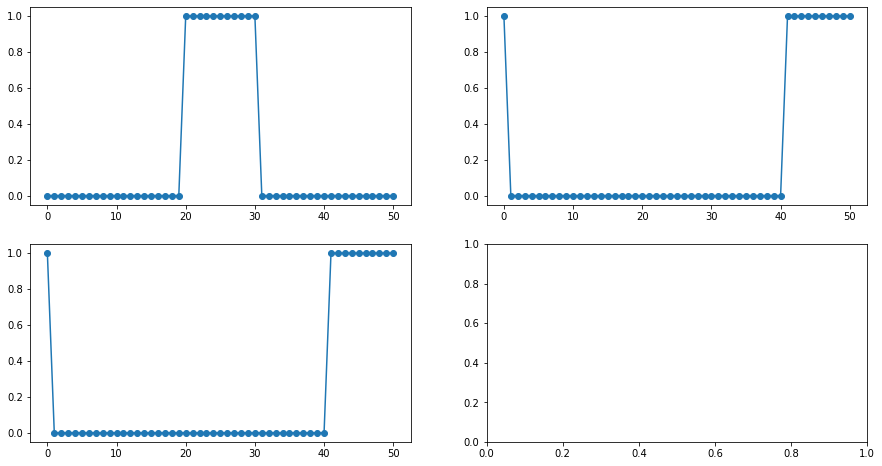

In [159]:
plt.close('all')
plt.figure(figsize=(15, 8))
plt.subplot(221)
plt.plot(h, '-o')
plt.subplot(222)
plt.plot(sig, '-o')
plt.subplot(223)
plt.plot(np.abs(sig), '-o')
plt.subplot(224)
plt.show()